# Python Data Extraction

In [736]:
from msc_code.scripts.notebook_setup import *

### Case Report Dataframe

In [737]:
case_report_column_headers = [
    "Study_ID",
    "Patient_ID",
    "Age_Yrs",  # Numeric. Age in years
    "Gender",    # Categorical. Male/Female
    "Motivation_Intent_To_Harm", # Categorical. Y/N/UK
    "Motivation_Protest",  # For betterment of or change of conditions, to influence others: Y/N/UK
    "Motivation_Other",    # Other Motivation: Text/string
    "Object_Button_Battery", # Y/N/UK
    "Object_Magnetic",  # Y/N/UK
    "Object_Long", # Y/N/UK. >6cm
    "Object_Sharp", # Y/N/UK
    "Object_Multiple", # Y/N/UK
    "Object_Other", # String. Notes or comments or values.
    "Outcome_Endoscopy",# Y/N/UK
    "Outcome_Surgery",  # Y/N/UK. True if Surgical intervention undertaken.
    "Outcome_Death",    # Y/N/UK
    "Outcome_Injury_Needing_Intervention", # Y/N/UK
    "Outcome_Perforation",  # Y/N/UK
    "Outcome_Obstruction",  # Y/N/UK
    "Outcome_Other",    # Y/N/UK
    "Comments"  # Y/N/UK
]

In [738]:
case_report_data_extraction = pd.DataFrame(columns=case_report_column_headers)

In [739]:
case_report_data_extraction.to_csv("/".join([RAW_DATA_DIR, "data_extraction", "case_report_data_extraction_template.csv"]), index=False)

### Study Data

In [740]:
study_data_columns = [
    "Study_ID",
    "Publication_Year",
    "First_Author",
    "DOI",
    "Exclude",
    "Bibliography_Searched",
    "Comments"
    ""
]

## Import included papers

In [741]:
import_path = os.path.join(PROC_DATA_DIR, 'full_text_screen')

ft_included = pd.read_csv('/'.join([import_path, 'full_text_screen_included_final.csv']))

ft_start = pd.read_csv('/'.join([import_path, 'full_text_screen_start.csv']))

ft_start = ft_start.rename(columns={
    'id': 'Study_ID'
})

In [742]:
ft_start.columns

Index(['Study_ID', 'Publication Year', 'Authors', 'Title', 'Publication Title',
       'Database', 'Exclude', 'Reason ID', 'Paediatric', 'Intention Reported',
       'Deliberate Intention', 'Unclear', 'Accessed', 'Comments'],
      dtype='object')

In [744]:
data_extraction_start = pd.DataFrame({
    'Study_ID': ft_included['Study_ID'],    # Unique Study_ID
    'First_Author': np.nan,                     # First Author: Lastname, F.   
    'Authors': np.nan, 
    'Title': None, 
    'Publication_Title': np.nan,
    'Study_Design': np.nan,
    'Study_Setting': np.nan, 
    'DOI': np.nan,
    'Data_Extracted': np.nan,
    'Bibliograph_Searched': np.nan,
    'Notes': np.nan,
})

ft_start = ft_start.rename(columns={
    'id': 'Study_ID'
})

titles = ft_start[['Study_ID', 'Title', 'Publication Year']]

data_extraction_start = pd.merge(
    data_extraction_start.drop(columns=['Title']),  # drop the empty Title first
    titles,
    on='Study_ID',
    how='left'
)

data_extraction_start = data_extraction_start.rename(columns={
    'Publication Year': 'Publication_Year'
})

data_extraction_start = data_extraction_start[['Study_ID', 'First_Author', 'Publication_Year', 'Authors',
       'Publication_Title', 'Title', 'Study_Design', 'Study_Setting', 'DOI', 'Notes']]

export_path = os.path.join(PROC_DATA_DIR, 'data_extraction')
data_extraction_start.to_csv('/'.join([export_path, 'data_extraction_start.csv']), index=False)

In [745]:
import_path = os.path.join(RAW_DATA_DIR, 'data_extraction')
study_data = pd.read_excel('/'.join([RAW_DATA_DIR, 'data_extraction', 'data_extraction_start.xlsx']))

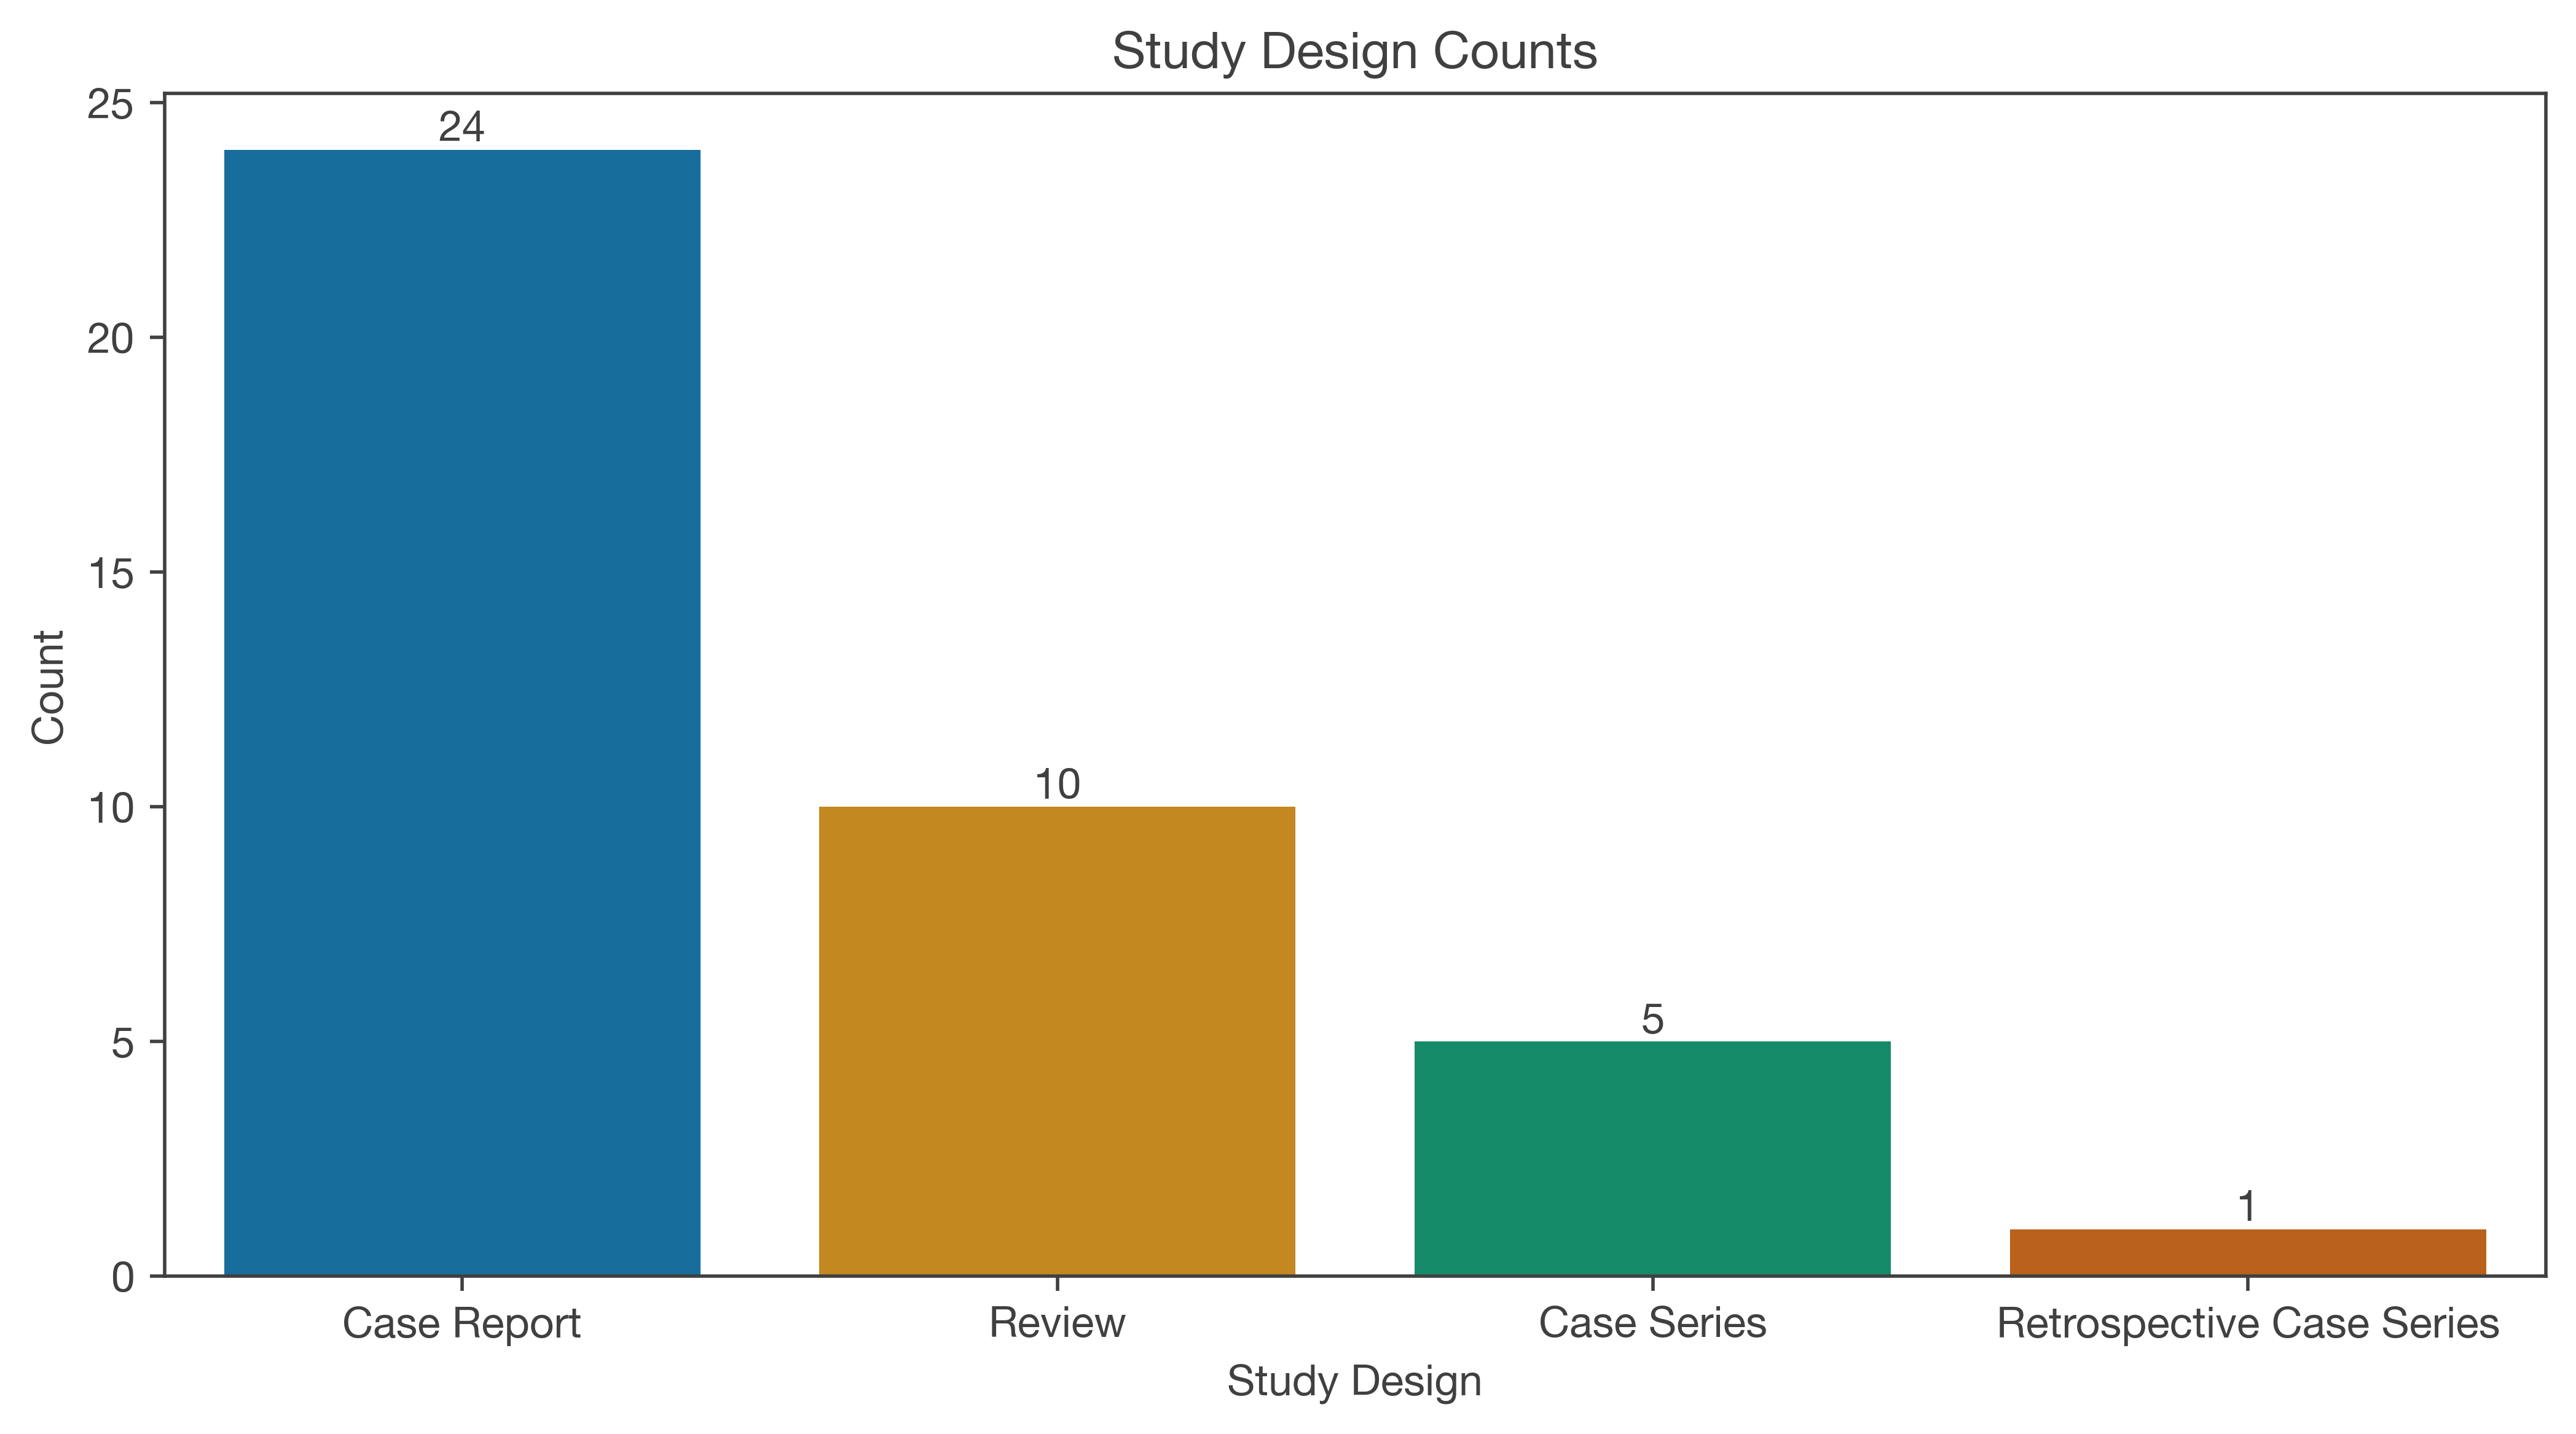

In [ ]:
plot_data = study_data['Study_Design'].value_counts().reset_index()
plot_data.columns = ['Study Design', 'Count']
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=plot_data, x='Study Design', y='Count', palette='colorblind')

# Set title and labels
ax.set(title=f'Study Design Counts', xlabel='Study Design', ylabel='Count')

# Add labels to the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.savefig('/'.join([FIG_DIR, "study_design_barplot.png"]), format='png', dpi=300)
# Show plot
plt.show()


In [ ]:
data_extraction_progess = study_data['Data_Extracted'].value_counts().reset_index()
data_extraction_progess

,Data_Extracted,count
0,N,74
1,Y,30


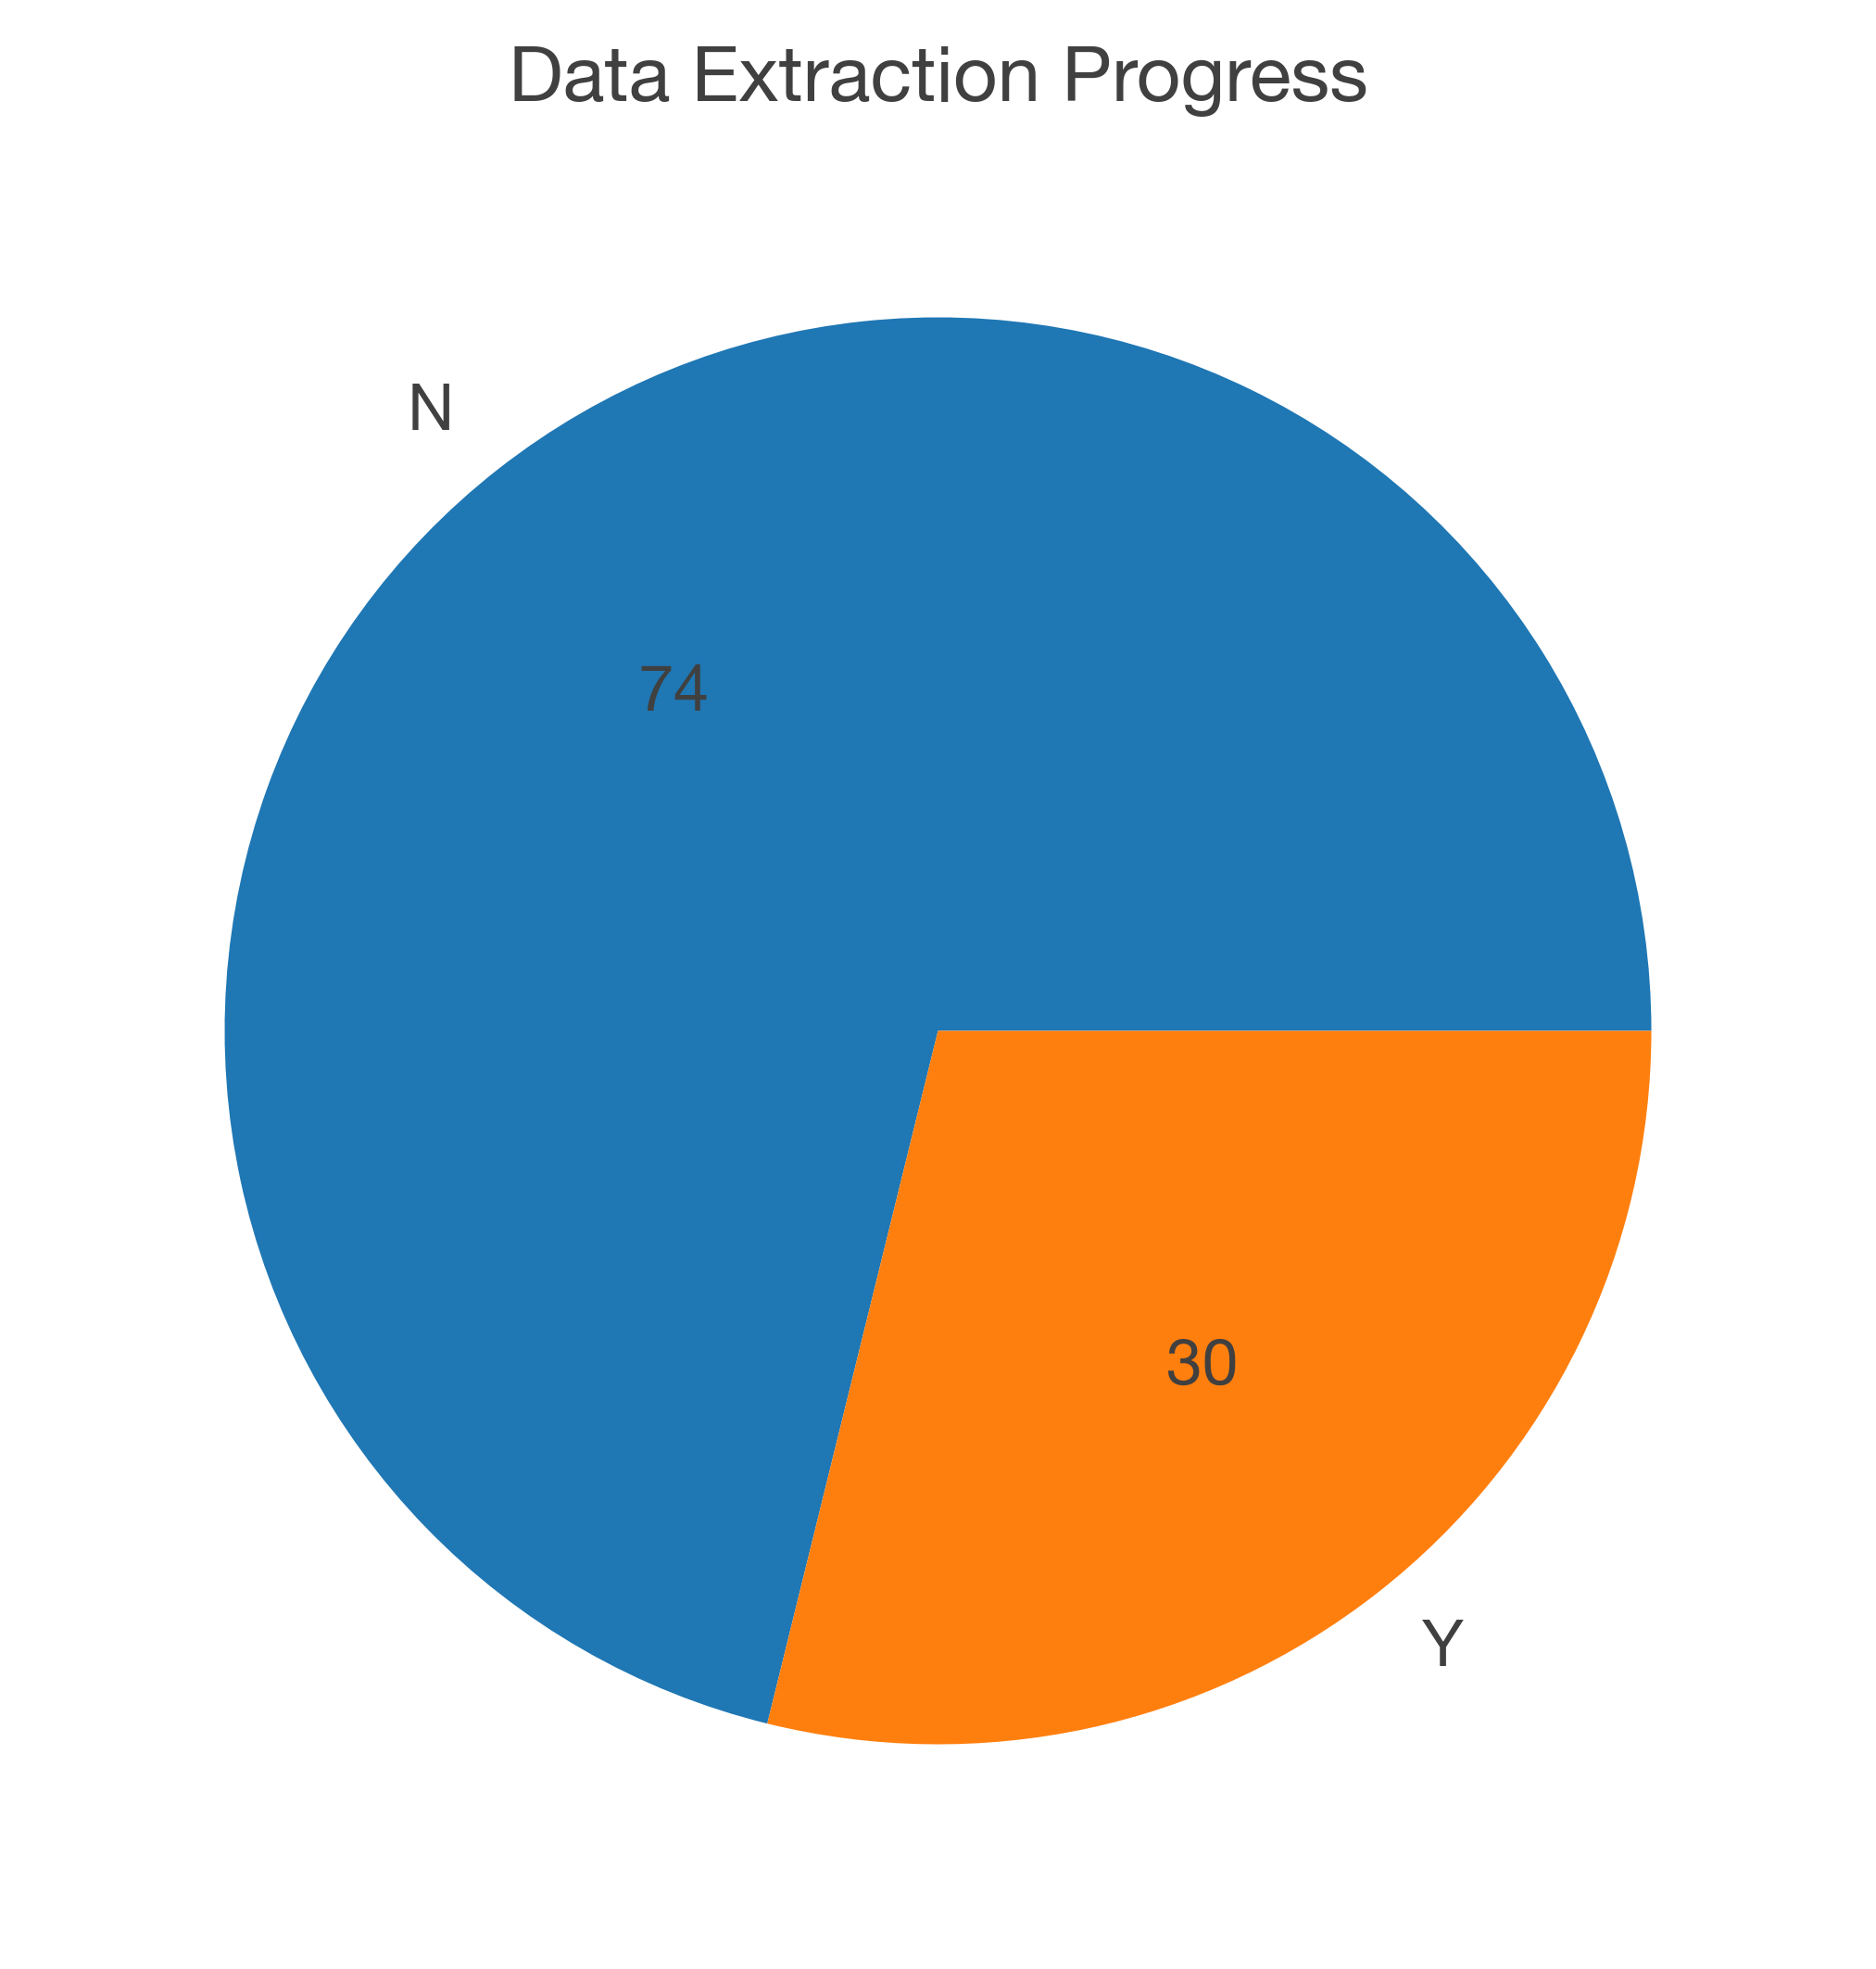

In [ ]:
data_extraction_progess.columns = ['Data Extracted', 'Count']
plt.figure(figsize=(10,5))
plt.pie(x=data_extraction_progess['Count'],
    labels=data_extraction_progess['Data Extracted'],
    autopct=lambda p: f'{p * sum(data_extraction_progess["Count"]) / 100:.0f}')
plt.title('Data Extraction Progress')
plt.show()

## Data Exploration

In [ ]:
# Import data
import_path = os.path.join(RAW_DATA_DIR, 'data_extraction')
case_data = pd.read_excel('/'.join([import_path, 'case_report_data_extraction.xlsx']))

In [ ]:
# Display column headers
case_data.columns

Index(['Study_ID', 'Patient_ID', 'Age_Yrs', 'Gender', 'Is_Prisoner',
       'Is_Psych_Inpat', 'Is_Displaced_Person', 'Psych_Hx',
       'Previous_Ingestions', 'Motivation_Intent_To_Harm',
       'Motivation_Protest', 'Motivation_Unknown', 'Motivation_Other',
       'Object_Button_Battery', 'Object_Magnet', 'Object_Long', 'Object_Sharp',
       'Object_Multiple', 'Object_Other', 'Outcome_Endoscopy',
       'Outcome_Surgery', 'Outcome_Death',
       'Outcome_Injury_Needing_Intervention', 'Outcome_Perforation',
       'Outcome_Obstruction', 'Outcome_Other', 'Comments'],
      dtype='object')

In [ ]:
case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Study_ID                             58 non-null     int64 
 1   Patient_ID                           58 non-null     object
 2   Age_Yrs                              58 non-null     object
 3   Gender                               58 non-null     object
 4   Is_Prisoner                          58 non-null     object
 5   Is_Psych_Inpat                       58 non-null     object
 6   Is_Displaced_Person                  58 non-null     object
 7   Psych_Hx                             58 non-null     object
 8   Previous_Ingestions                  58 non-null     object
 9   Motivation_Intent_To_Harm            58 non-null     object
 10  Motivation_Protest                   58 non-null     object
 11  Motivation_Unknown                   58 non-nul

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_9878/1608690902.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  case_data['Age_Yrs'] = case_data['Age_Yrs'].replace('UK', np.nan)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Age Distribution (n = 58)'), Text(0.5, 0, 'Age (Years)')]

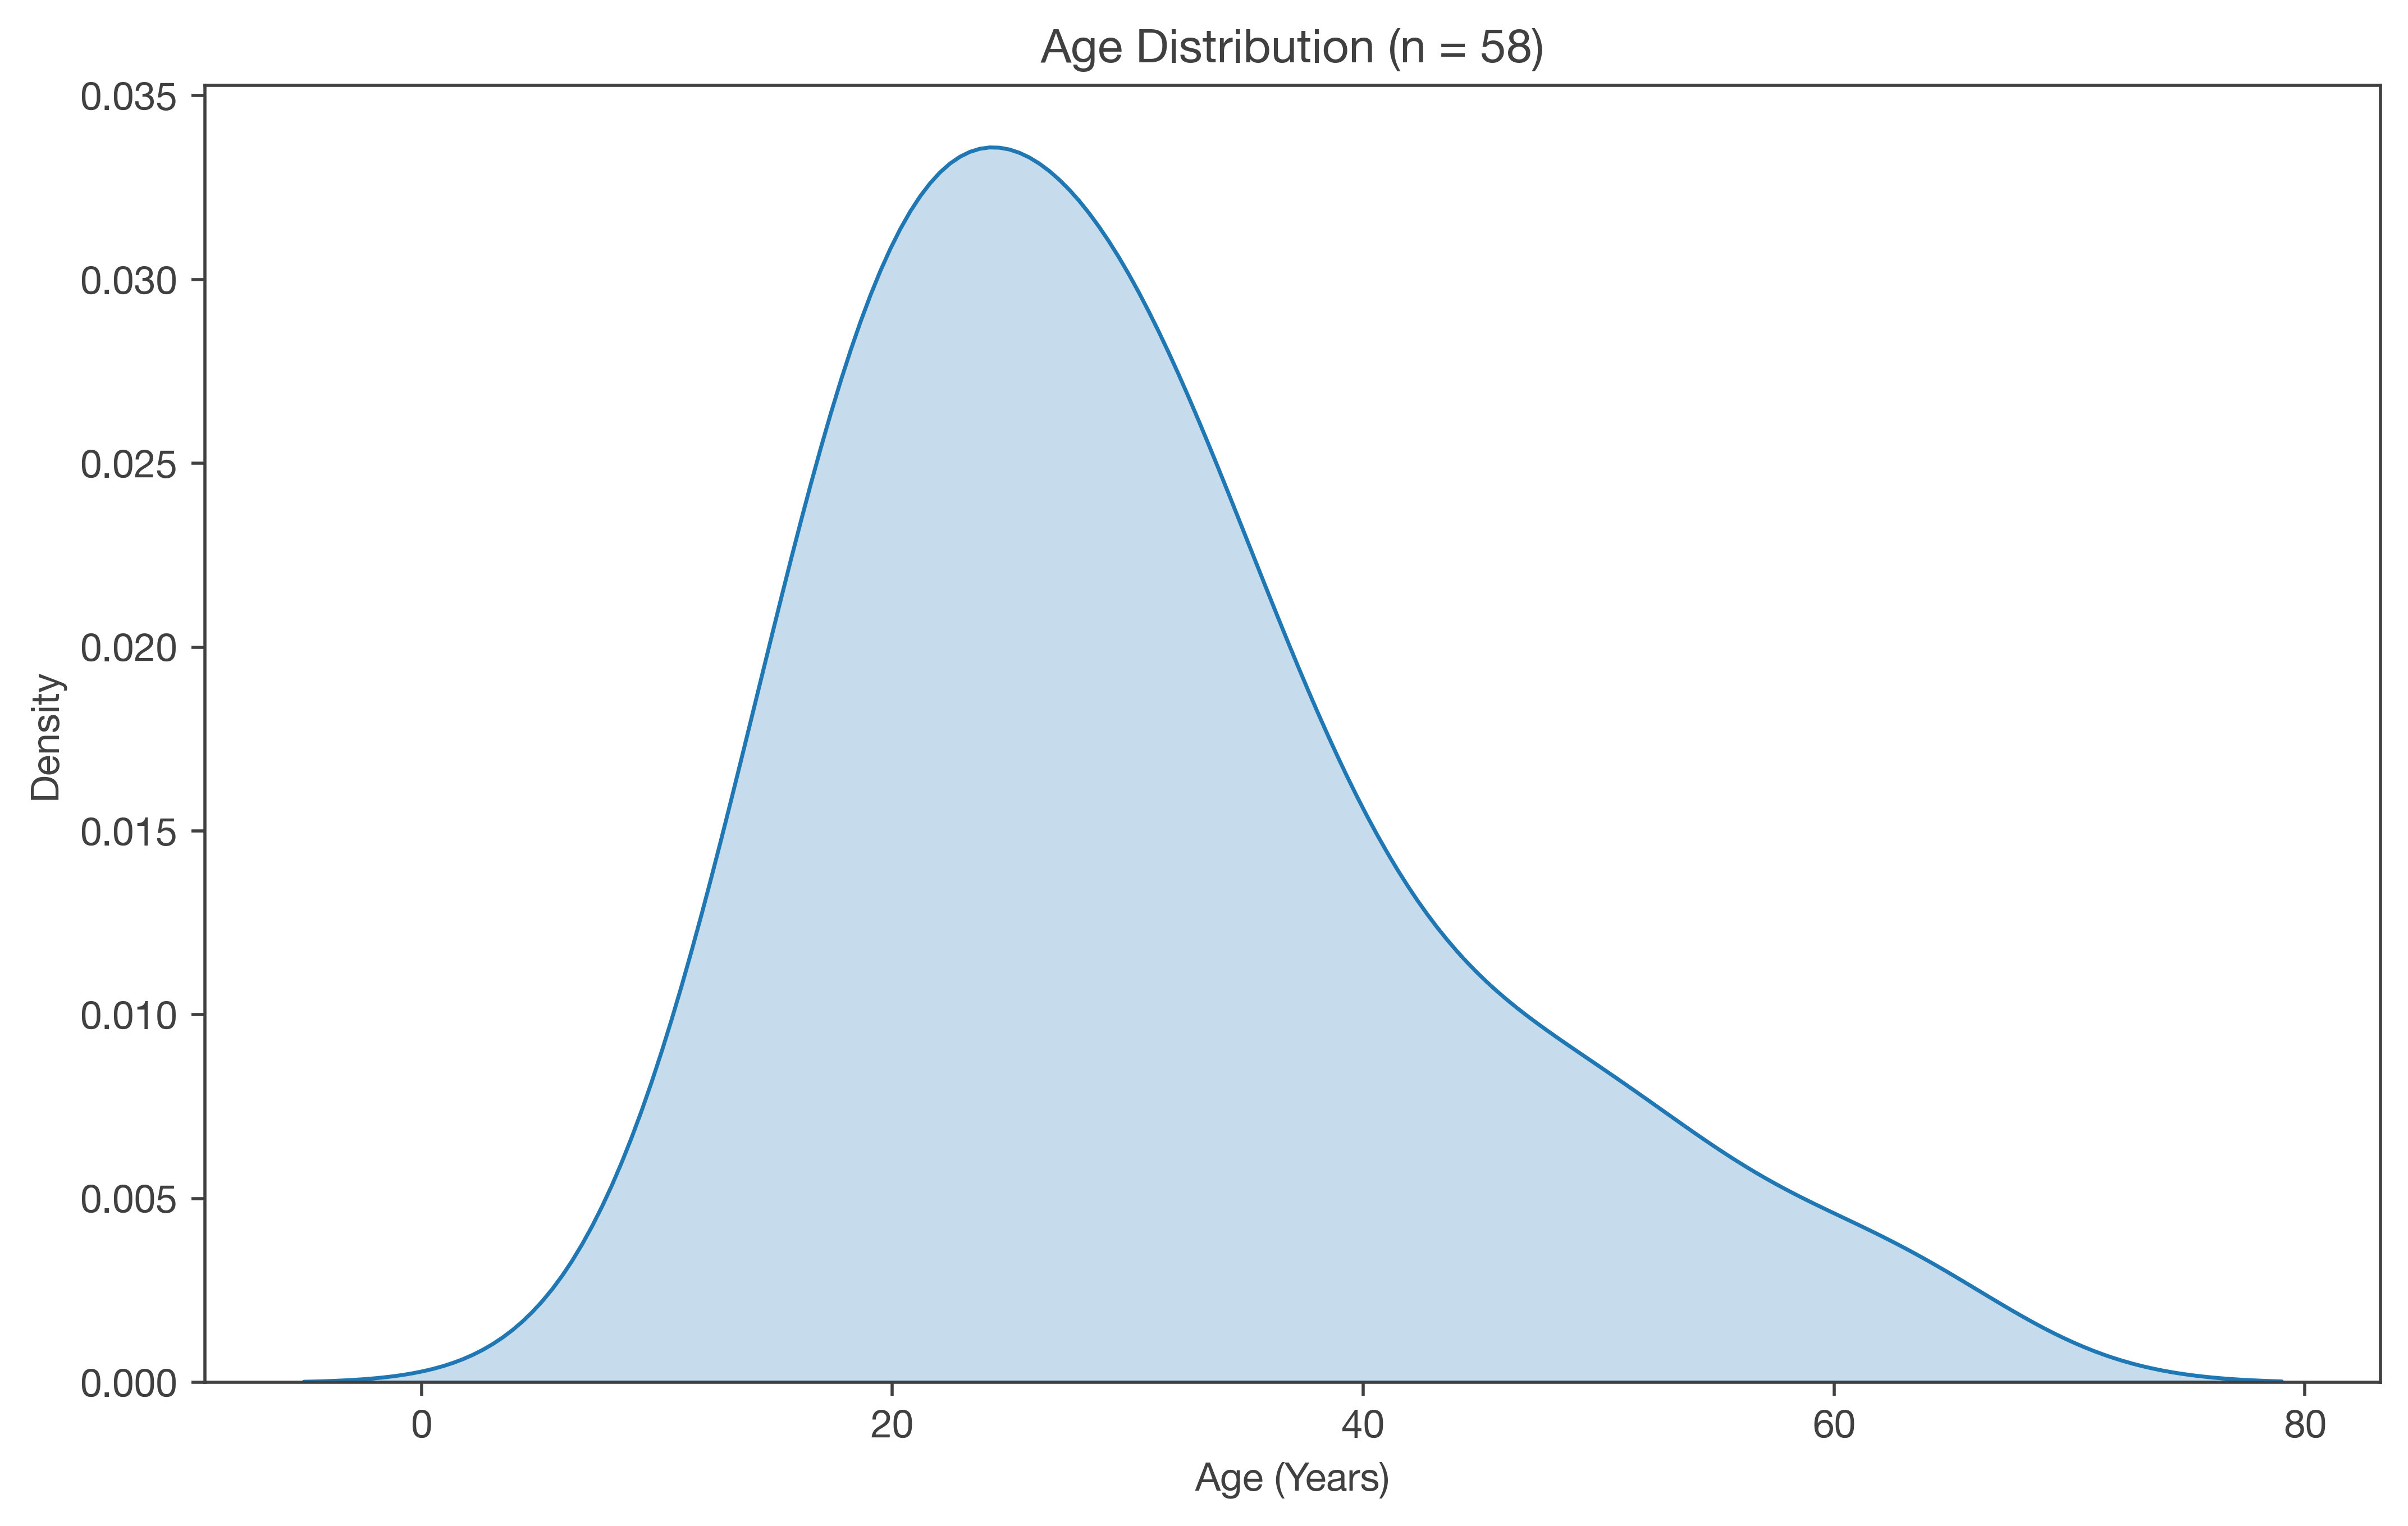

In [ ]:
# Explore Age

# Force UK (Unknown) values to NaN to allow type casting to numeric.
case_data['Age_Yrs'] = case_data['Age_Yrs'].replace('UK', np.nan)

# Describe data
case_data['Age_Yrs'].describe()

# Age
case_data['Age_Yrs'] = case_data['Age_Yrs'].replace('UK', np.nan)

age_distribution_kde_plot = sns.kdeplot(case_data['Age_Yrs'], fill=True)
age_distribution_kde_plot.set(title=f'Age Distribution (n = {len(case_data)})', xlabel='Age (Years)')

In [ ]:
case_data['Gender'] = case_data['Gender'].astype('category')

gender_counts = case_data['Gender'].value_counts().reset_index() 

gender_counts

,Gender,count
0,Male,31
1,Female,19
2,UK,8


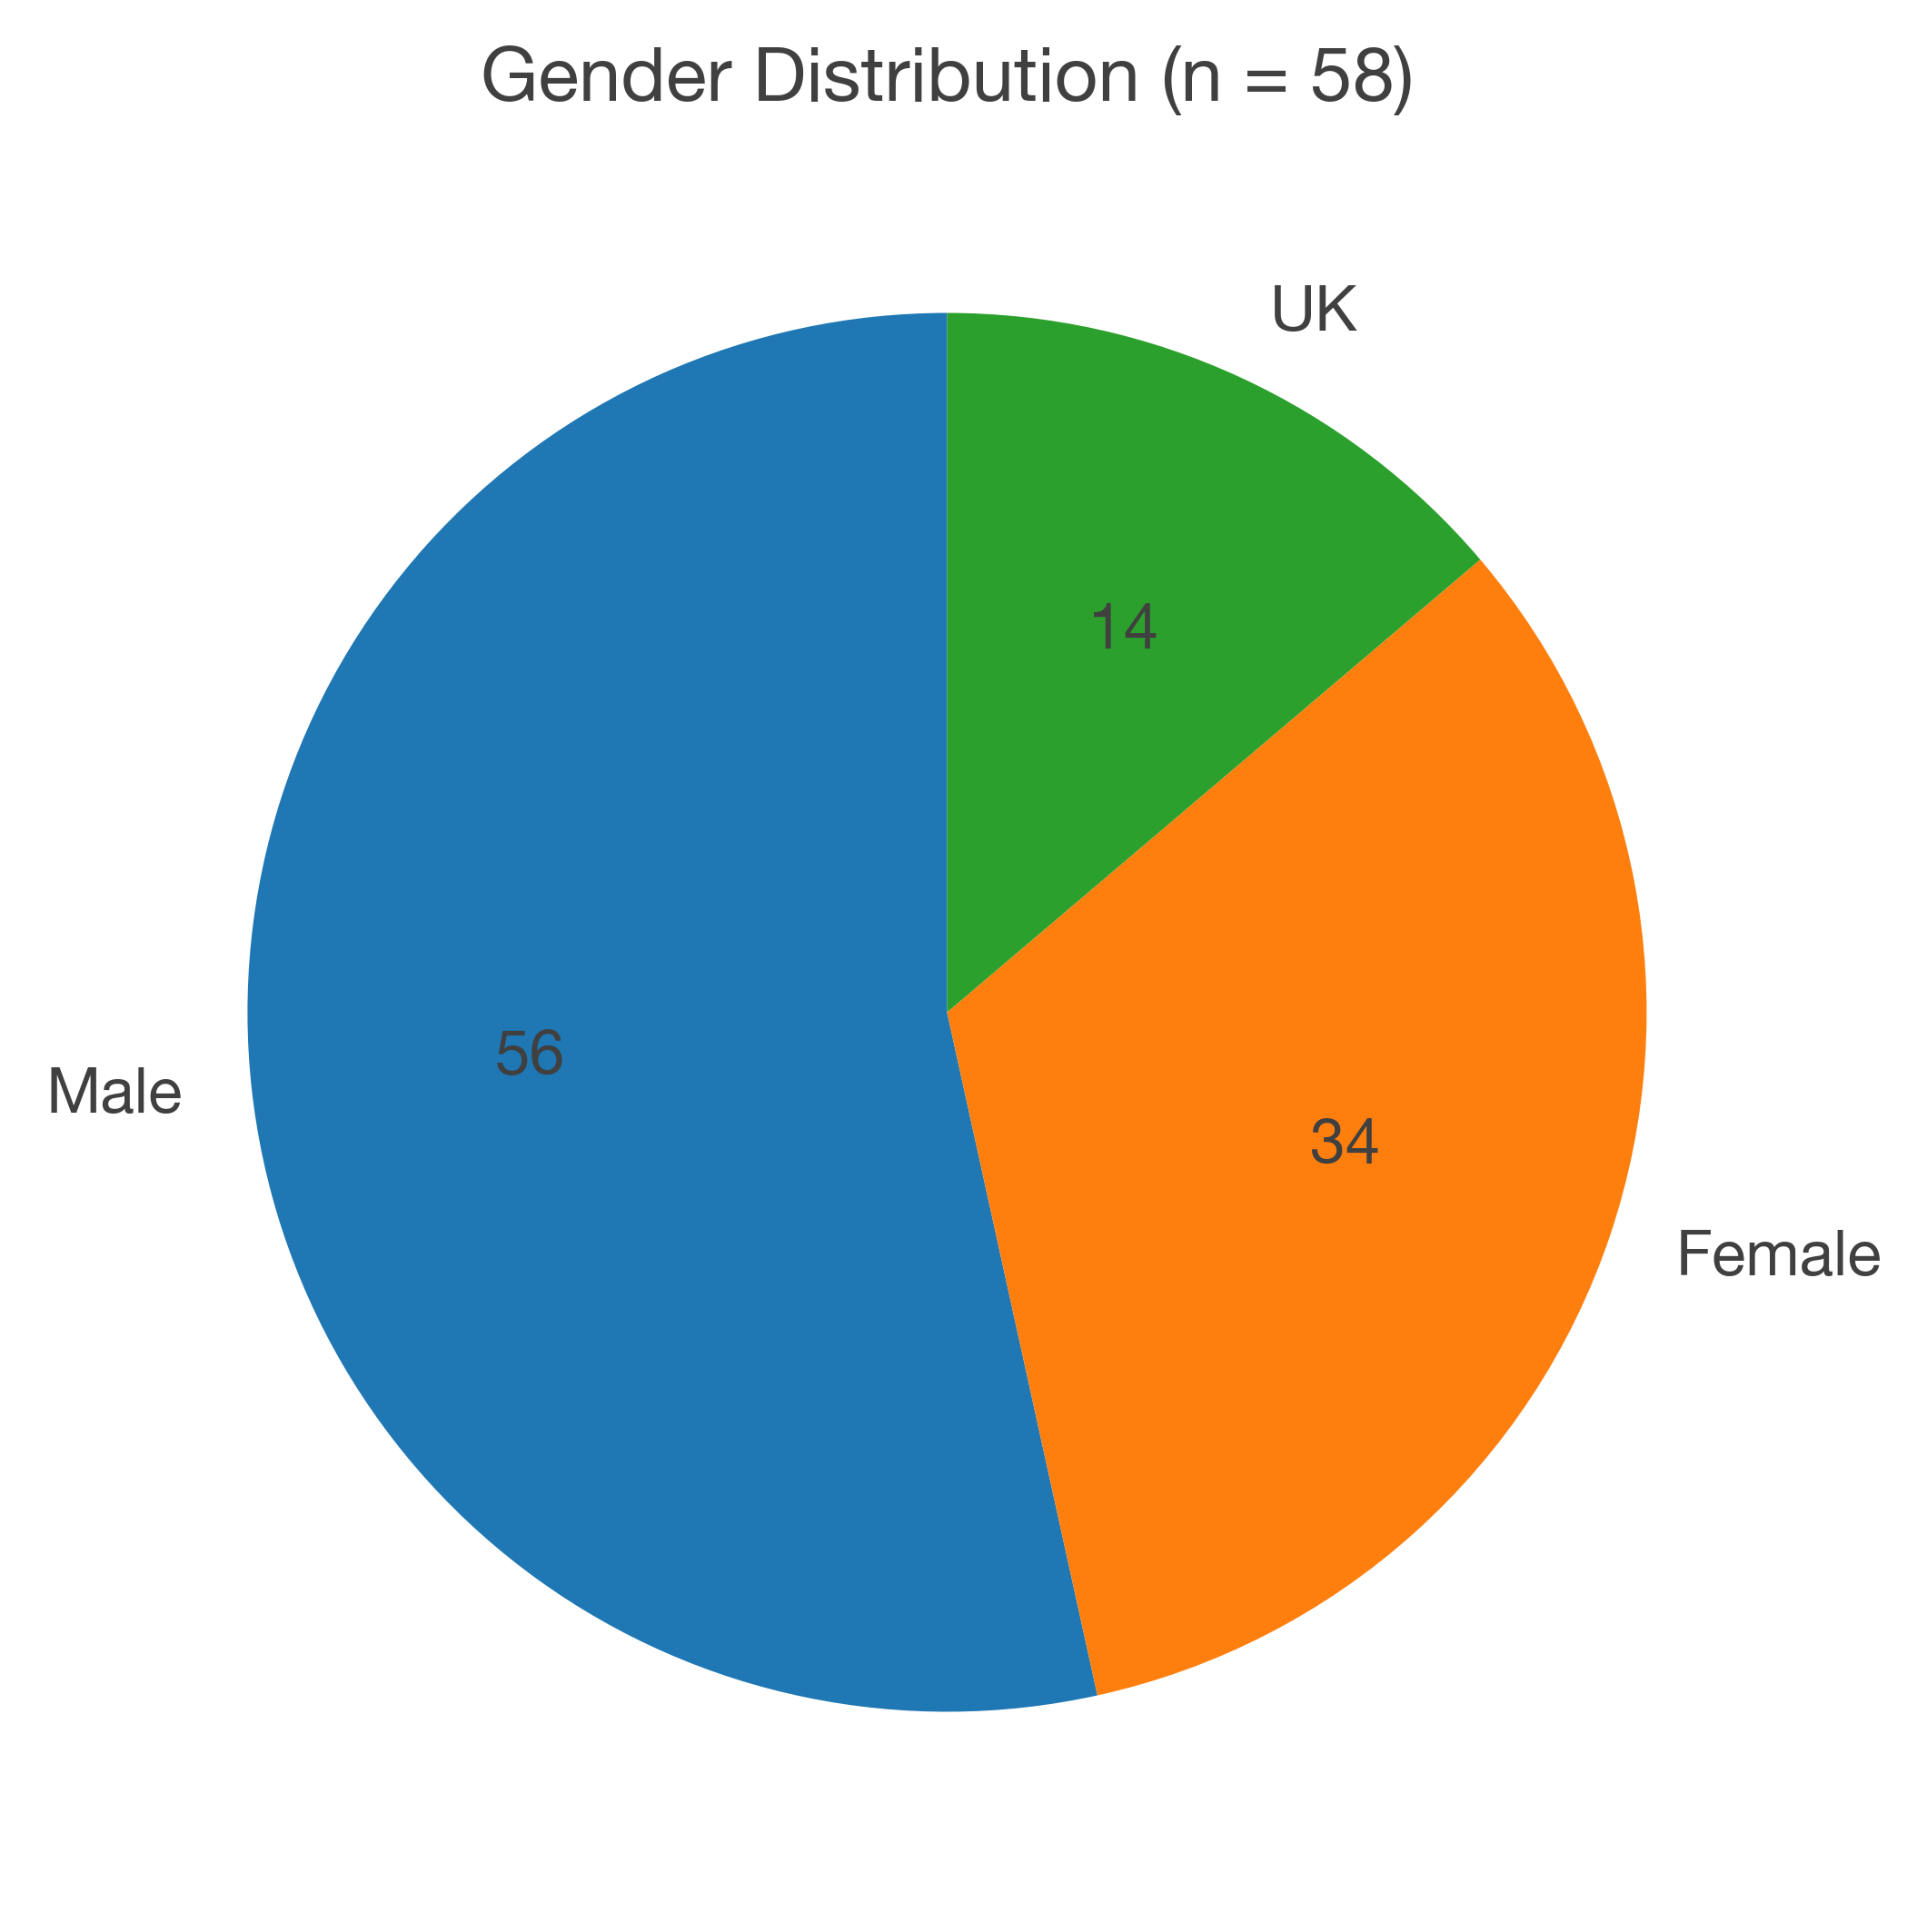

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(x=gender_counts['count'],
        startangle=90,
        autopct=lambda p: f'{p * sum(data_extraction_progess["Count"]) / 100:.0f}',
        labels=gender_counts['Gender'])
plt.title(f'Gender Distribution (n = {len(case_data)})')
plt.show()

In [ ]:
motivation_columns = ['Motivation_Intent_To_Harm', 'Motivation_Protest', 'Motivation_Unknown', 'Motivation_Other']
motivation_data = case_data[motivation_columns]
motivation_counts = motivation_data.apply(pd.value_counts)

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_9878/2019812983.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  motivation_counts = motivation_data.apply(pd.value_counts)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_9878/2019812983.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  motivation_counts = motivation_data.apply(pd.value_counts)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_9878/2019812983.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  motivation_counts = motivation_data.apply(pd.value_counts)
/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_9878/2019812983.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use 

### Psychiatric History Rates

In [ ]:
psychiatric_history_rates = case_data['Psych_Hx'].value_counts(normalize=True)
psychiatric_history_rates

Psych_Hx
N     0.482759
Y     0.379310
UK    0.137931
Name: proportion, dtype: float64

### Prisoner Rates

In [ ]:
prisoner_rates = case_data['Is_Prisoner'].value_counts(normalize=True)
prisoner_rates

Is_Prisoner
N    0.810345
Y    0.189655
Name: proportion, dtype: float64

### Recurrent Ingestion

“Deliberate foreign body ingestion (DFBI) accounts for up to 92% of adolescent and adult cases of FBI in the U.S. Of these, 85% have a psychiatric diagnosis and 70% occur in the incarcerated population.14,15 Eighty-four percent have a prior history of FBI.14 Psychosis, malingering, obsessive compulsive disorder, and bipolar disorder have all been implicated in DFBI.3,4 The economic costs have been estimated to average USD$6616 per case.16” ([Brunner J. et al., 2015, p. 5](zotero://select/library/items/A26MJ4UF)) ([pdf](zotero://open-pdf/library/items/MRCG5MYG?page=5&annotation=EMAKVNJC))

In [ ]:
# Calculate percentage of cases that have reported previous ingestion
previous_ingestion_rates = case_data['Previous_Ingestions'].value_counts(normalize=True)

### Multiple Object Ingestion Rates

In [ ]:
multiple_object_rates = case_data['Object_Multiple'].value_counts(normalize=True)
multiple_object_rates

Object_Multiple
N     0.568966
Y     0.396552
UK    0.034483
Name: proportion, dtype: float64

### Object Characteristics Rates

In [ ]:
sharp_object_rates = case_data['Object_Sharp'].value_counts(normalize=True)
sharp_object_rates

Object_Sharp
N     0.465517
Y     0.413793
UK    0.120690
Name: proportion, dtype: float64

### Long Sharp Object Rates

In [ ]:
# long_sharp_case_data = case_data[case_data['Object_Long'] == 'Y' & case_data['Object_Sharp'] == 'Y']

### Endoscopy Rates

As nearly 90% of objects pass through the rectum without incident, the majority of foreign body ingestions may be treated conservatively, either with admission and observation, or discharge and follow up, depending on institutional practice (Figure 1).12,17

In [ ]:
endoscopy_rates = case_data['Outcome_Endoscopy'].value_counts(normalize=True)
endoscopy_rates

Outcome_Endoscopy
N     0.666667
Y     0.263158
UK    0.070175
Name: proportion, dtype: float64

### Surgery Rates

In [ ]:
surgery_rates = case_data['Outcome_Surgery'].value_counts(normalize=True)
surgery_rates

Outcome_Surgery
Y     0.724138
N     0.206897
UK    0.068966
Name: proportion, dtype: float64

### Endoscopy + Surgery Rates

In [ ]:
endoscopy_surgery_data = case_data[
    (case_data['Outcome_Surgery'] == 'Y') & 
    (case_data['Outcome_Endoscopy'] == 'Y')
]

endoscopy_surgery_rate = len(endoscopy_surgery_data) / len(case_data) * 100
print(f"Endoscopy AND Surgery Rate: {endoscopy_surgery_rate:.2f}%")

Endoscopy AND Surgery Rate: 8.62%


### Complication Rates

In [ ]:
outcome_columns = ['Study_ID', 'Patient_ID', 'Outcome_Endoscopy', 'Outcome_Surgery', 'Outcome_Death', 'Outcome_Injury_Needing_Intervention', 'Outcome_Perforation', 'Outcome_Obstruction', 'Outcome_Other']
complications_data = case_data[outcome_columns]

complications_data = complications_data.groupby('Study_ID')['Patient_ID'].value_counts()

complications_data



Study_ID  Patient_ID
3         3-001         1
          3-002         1
          3-003         1
          3-004         1
          3-005         1
          3-006         1
          3-007         1
          3-008         1
          3-009         1
          3-010         1
          3-011         1
          3-012         1
          3-013         1
          3-014         1
          3-015         1
          3-016         1
          3-017         1
          3-018         1
          3-019         1
39        39-001        1
51        51-001        1
          51-002        1
          51-003        1
          51-004        1
          51-005        1
54        54-001        1
60        60-001        1
61        61-001        1
85        85-001        1
92        92-001        1
99        99-001        1
101       101-001       1
          101-002       1
          101-003       1
          101-004       1
          101-005       1
113       113-001       1
131       131-001

### Mortality Rates

In [ ]:
mortality_rates = case_data['Outcome_Death'].value_counts(normalize=True)
mortality_rates

Outcome_Death
N     0.810345
UK    0.103448
Y     0.086207
Name: proportion, dtype: float64

### Protest Reasons